<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Removing Duplicates**


Estimated time needed: **30** minutes


## Introduction


In this lab, you will focus on data wrangling, an important step in preparing data for analysis. Data wrangling involves cleaning and organizing data to make it suitable for analysis. One key task in this process is removing duplicate entries, which are repeated entries that can distort analysis and lead to inaccurate conclusions.  


## Objectives


In this lab you will perform the following:


1. Identify duplicate rows  in the dataset.
2. Use suitable techniques to remove duplicate rows and verify the removal.
3. Summarize how to handle missing values appropriately.
4. Use ConvertedCompYearly to normalize compensation data.
   


### Install the Required Libraries


In [1]:
!pip install pandas

### Step 1: Import Required Libraries


In [2]:
import pandas as pd

### Step 2: Load the Dataset into a DataFrame



load the dataset using pd.read_csv()


In [3]:
# Define the URL of the dataset
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)

# Display the first few rows to ensure it loaded correctly
print(df.head())


   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

**Note: If you are working on a local Jupyter environment, you can use the URL directly in the <code>pandas.read_csv()</code>  function as shown below:**



#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv")


### Step 3: Identifying Duplicate Rows


**Task 1: Identify Duplicate Rows**
  1. Count the number of duplicate rows in the dataset.
  2. Display the first few duplicate rows to understand their structure.


In [4]:
duplicate_count = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_count)

duplicates = df[df.duplicated()]
print("\nFirst few duplicate rows:")
print(duplicates.head())

Number of duplicate rows: 0

First few duplicate rows:
Empty DataFrame
Columns: [ResponseId, MainBranch, Age, Employment, RemoteWork, Check, CodingActivities, EdLevel, LearnCode, LearnCodeOnline, TechDoc, YearsCode, YearsCodePro, DevType, OrgSize, PurchaseInfluence, BuyNewTool, BuildvsBuy, TechEndorse, Country, Currency, CompTotal, LanguageHaveWorkedWith, LanguageWantToWorkWith, LanguageAdmired, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, DatabaseAdmired, PlatformHaveWorkedWith, PlatformWantToWorkWith, PlatformAdmired, WebframeHaveWorkedWith, WebframeWantToWorkWith, WebframeAdmired, EmbeddedHaveWorkedWith, EmbeddedWantToWorkWith, EmbeddedAdmired, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, MiscTechAdmired, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, ToolsTechAdmired, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, NEWCollabToolsAdmired, OpSysPersonal use, OpSysProfessional use, OfficeStackAsyncHaveWorkedWith, OfficeStackAsyncWantToWorkWith, OfficeStackAsyncAdm

### Step 4: Removing Duplicate Rows


**Task 2: Remove Duplicates**
   1. Remove duplicate rows from the dataset using the drop_duplicates() function.
2. Verify the removal by counting the number of duplicate rows after removal .


In [7]:
# Optional: drop duplicates and see the new shape
df_cleaned = df.drop_duplicates()
print("Original shape:", df.shape)
print("Shape after dropping duplicates:", df_cleaned.shape)

Original shape: (65437, 114)
Shape after dropping duplicates: (65437, 114)


### Step 5: Handling Missing Values


**Task 3: Identify and Handle Missing Values**
   1. Identify missing values for all columns in the dataset.
   2. Choose a column with significant missing values (e.g., EdLevel) and impute with the most frequent value.


In [11]:
# Step 1: Identify missing values in all columns
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percent})
missing_df = missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

print("🔍 Columns with missing values:")
print(missing_df)

# Step 2: Choose a column with significant missing values for imputation (e.g., EdLevel)
column_to_impute = 'AINextMuch less integrated'
most_frequent_value = df[column_to_impute].mode()[0]

# Impute missing values in AINextMuch less integrated with the most frequent value
df[column_to_impute].fillna(most_frequent_value, inplace=True)

# Step 3: Confirm that the missing values have been handled
print(f"\n✅ Missing values in '{column_to_impute}' after imputation:", df[column_to_impute].isnull().sum())


🔍 Columns with missing values:
                            Missing Values  Percentage
AINextMuch less integrated           64289   98.245641
AINextLess integrated                63082   96.401119
AINextNo change                      52939   80.900714
AINextMuch more integrated           51999   79.464217
EmbeddedAdmired                      48704   74.428840
...                                    ...         ...
LanguageHaveWorkedWith                5692    8.698443
YearsCode                             5568    8.508948
NEWSOSites                            5151    7.871693
LearnCode                             4949    7.563000
AISelect                              4530    6.922689

[108 rows x 2 columns]

✅ Missing values in 'AINextMuch less integrated' after imputation: 0


/tmp/ipykernel_2032/3098515916.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column_to_impute].fillna(most_frequent_value, inplace=True)


### Step 6: Normalizing Compensation Data


**Task 4: Normalize Compensation Data Using ConvertedCompYearly**
   1. Use the ConvertedCompYearly column for compensation analysis as the normalized annual compensation is already provided.
   2. Check for missing values in ConvertedCompYearly and handle them if necessary.


In [12]:
# Step 1: Check for missing values in ConvertedCompYearly
missing_converted_comp = df['ConvertedCompYearly'].isnull().sum()
missing_percent_converted_comp = (missing_converted_comp / len(df)) * 100

print(f"Missing values in 'ConvertedCompYearly': {missing_converted_comp} ({missing_percent_converted_comp:.2f}%)")

# Step 2: Handle missing values in ConvertedCompYearly
# Option 1: Impute with the median value
median_value = df['ConvertedCompYearly'].median()
df['ConvertedCompYearly'].fillna(median_value, inplace=True)

# Option 2: Remove rows with missing ConvertedCompYearly (if needed)
# df = df.dropna(subset=['ConvertedCompYearly'])

# Step 3: Confirm no missing values
missing_converted_comp_after = df['ConvertedCompYearly'].isnull().sum()
print(f"Missing values in 'ConvertedCompYearly' after handling: {missing_converted_comp_after}")


Missing values in 'ConvertedCompYearly': 42002 (64.19%)
Missing values in 'ConvertedCompYearly' after handling: 0


/tmp/ipykernel_2032/3916092353.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(median_value, inplace=True)


### Step 7: Summary and Next Steps


**In this lab, you focused on identifying and removing duplicate rows.**

- You handled missing values by imputing the most frequent value in a chosen column.

- You used ConvertedCompYearly for compensation normalization and handled missing values.

- For further analysis, consider exploring other columns or visualizing the cleaned dataset.


In [18]:
print(df.columns.tolist())

['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'TechDoc', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'BuyNewTool', 'BuildvsBuy', 'TechEndorse', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'LanguageAdmired', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'DatabaseAdmired', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'PlatformAdmired', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'WebframeAdmired', 'EmbeddedHaveWorkedWith', 'EmbeddedWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'MiscTechAdmired', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'ToolsTechAdmired', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'NEWCollabToolsAdmired', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackAsyncA

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Impute with mode (most frequent value)
# Corrected imputation loop
# Fix: Impute with mode or median safely using .loc
for col in missing_df.index:
    if col in df.columns:  # Make sure the column wasn't dropped
        if df[col].dtype == 'object':
            df.loc[:, col] = df[col].fillna(df[col].mode()[0])
        else:
            df.loc[:, col] = df[col].fillna(df[col].median())  # Or mean, depending on context


/tmp/ipykernel_2032/1402343793.py:8: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


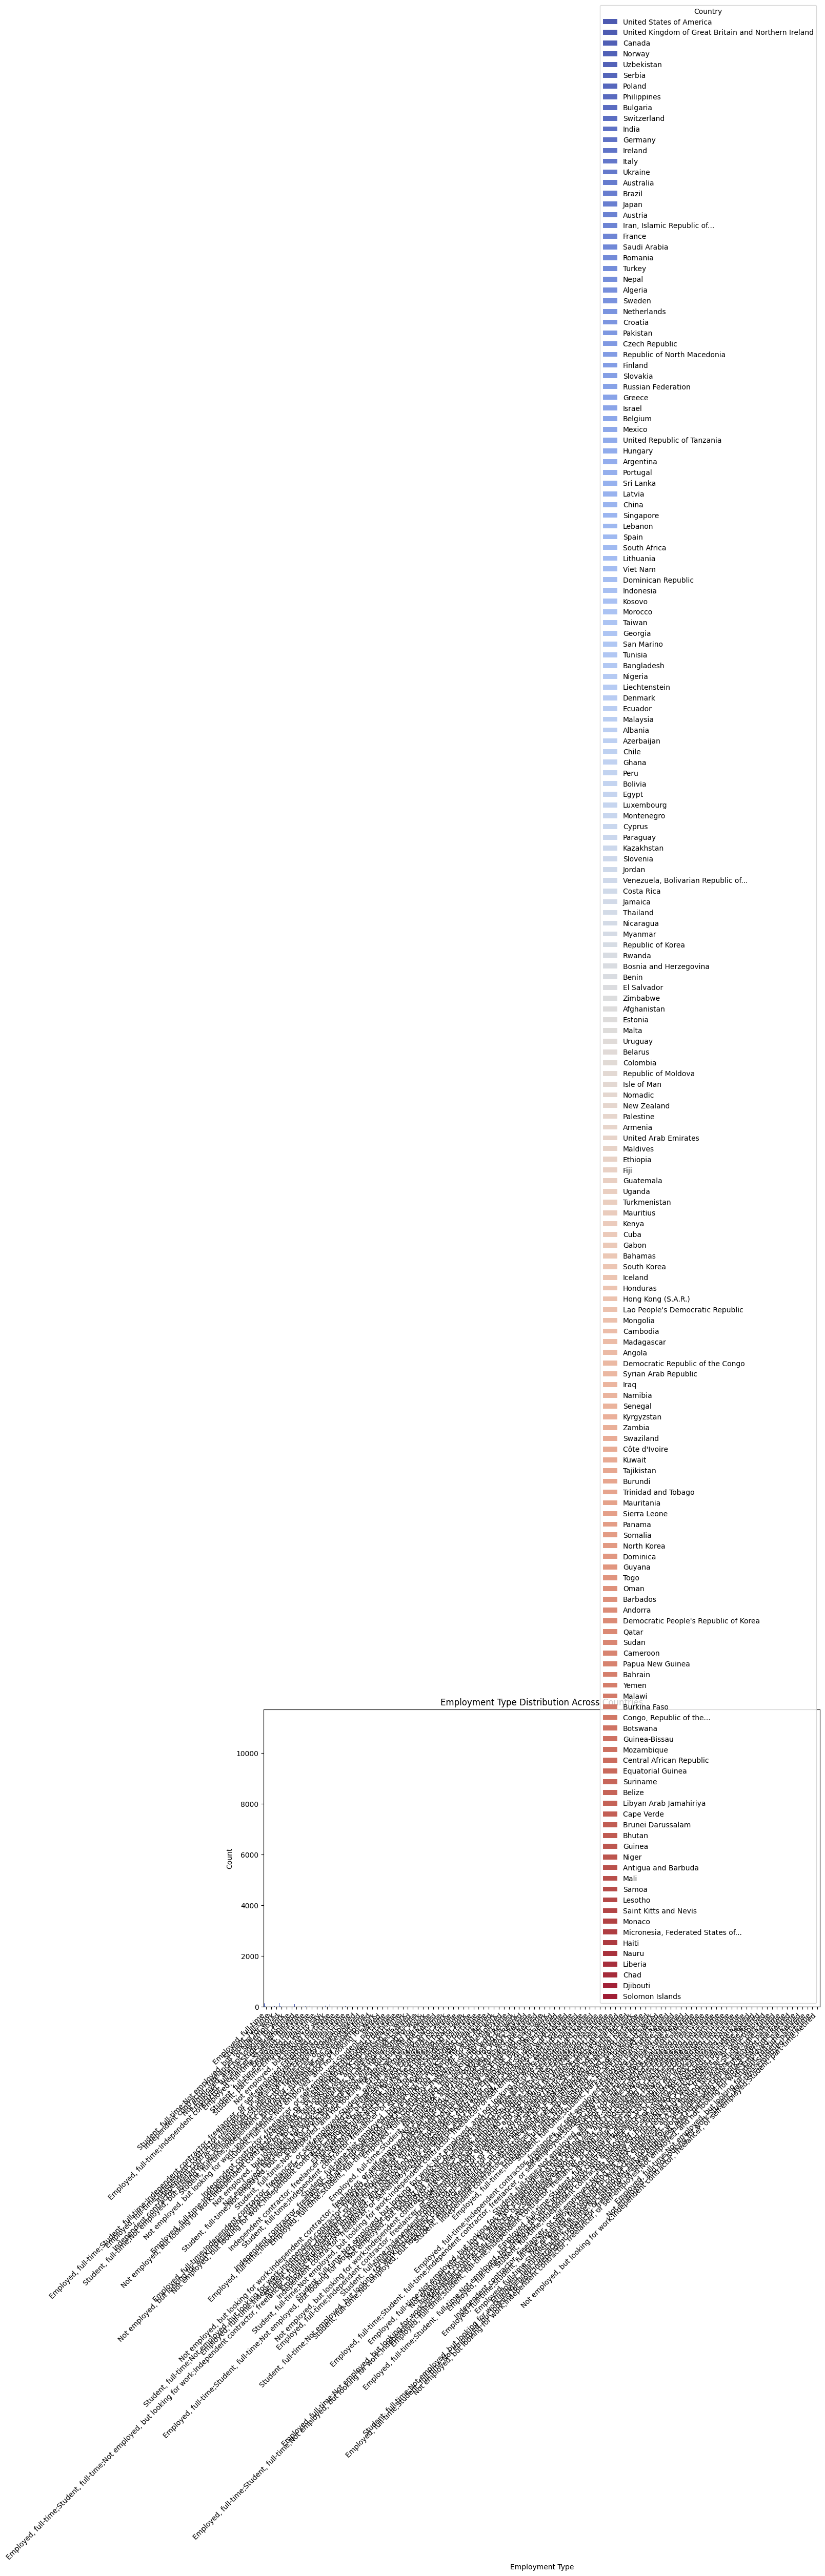

In [28]:
plt.figure(figsize=(14, 10))
sns.countplot(data=df, x='Employment', hue='Country', palette='coolwarm')
plt.title('Employment Type Distribution Across Countries')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right') # Tilt and align labels better
plt.subplots_adjust(bottom=0.3)  # Add more space at bottom
plt.tight_layout()
plt.show()


<!--
## Change Log

|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-11-05|1.2|Madhusudhan Moole|Updated lab|
|2024-09-24|1.1|Madhusudhan Moole|Updated lab|
|2024-09-23|1.0|Raghul Ramesh|Created lab|

--!>


Copyright © IBM Corporation. All rights reserved.
